In [1]:
import pandas
from pytz import utc
from datetime import datetime
import matplotlib.pyplot as plt
data=pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [2]:
data["Day"]=data["Timestamp"].dt.date
day_average=data.groupby(["Day"]).mean()
day_average.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

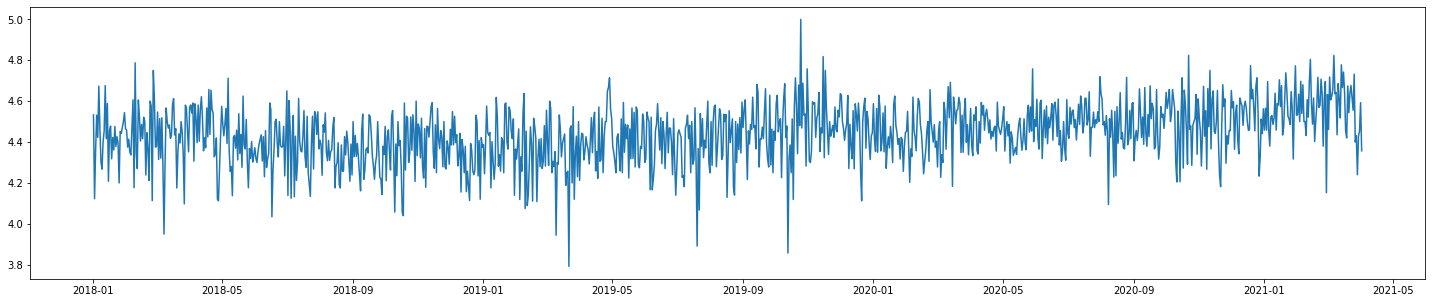

In [3]:
plt.figure(figsize=(25,5))
plt.plot(day_average.index, day_average["Rating"])

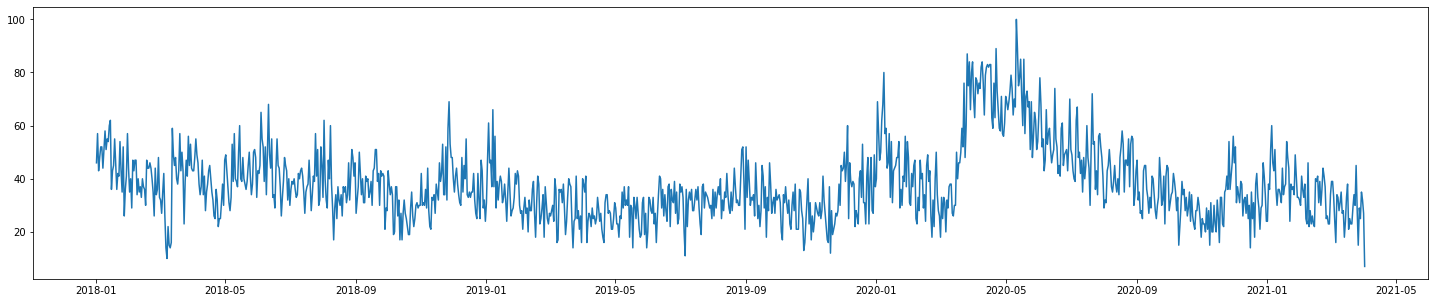

In [4]:
data["Day"]=data["Timestamp"].dt.date
day_count=data.groupby(["Day"]).count()
plt.figure(figsize=(25,5))
plt.plot(day_average.index, day_count["Rating"])

### Rating average/count by a week

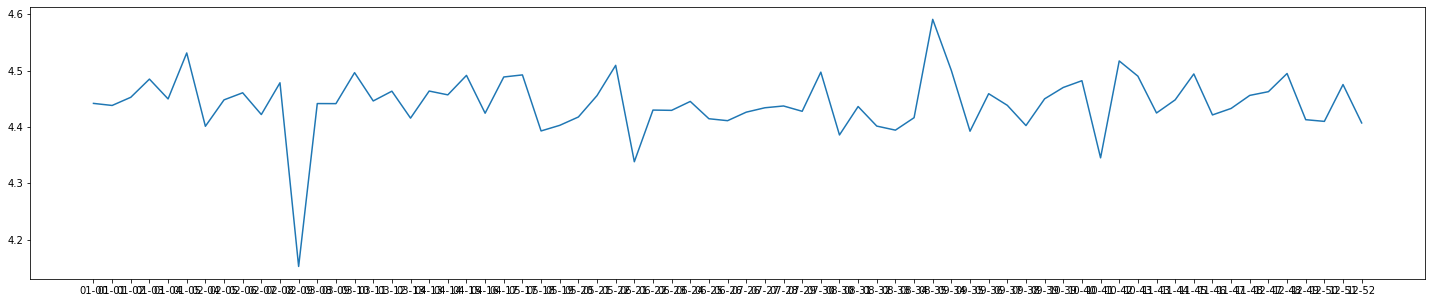

In [5]:
data["Week"]=data["Timestamp"].dt.strftime("%m-%U")
week_average=data.groupby(["Week"]).mean()
plt.figure(figsize=(25,5))
plt.plot(week_average.index, week_average["Rating"])

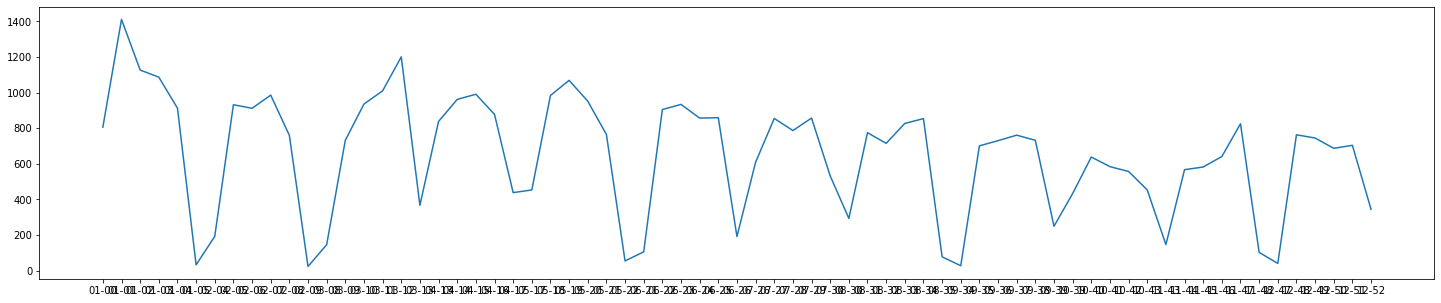

In [6]:
data["Week"]=data["Timestamp"].dt.strftime("%m-%U")
week_count=data.groupby(["Week"]).count()
plt.figure(figsize=(25,5))
plt.plot(week_average.index, week_count["Rating"])

### Rating average/count by a month

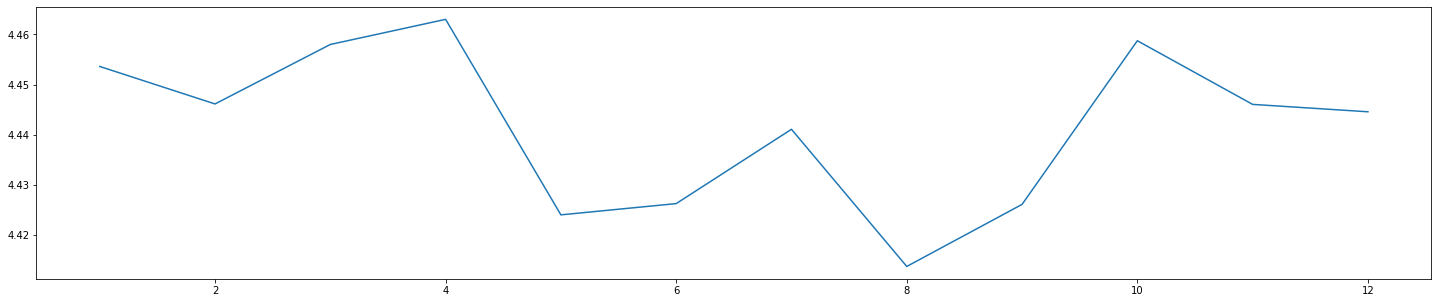

In [7]:
data["Month"]=data["Timestamp"].dt.month
month_average=data.groupby(["Month"]).mean()
plt.figure(figsize=(25, 5))
plt.plot(month_average.index, month_average["Rating"])

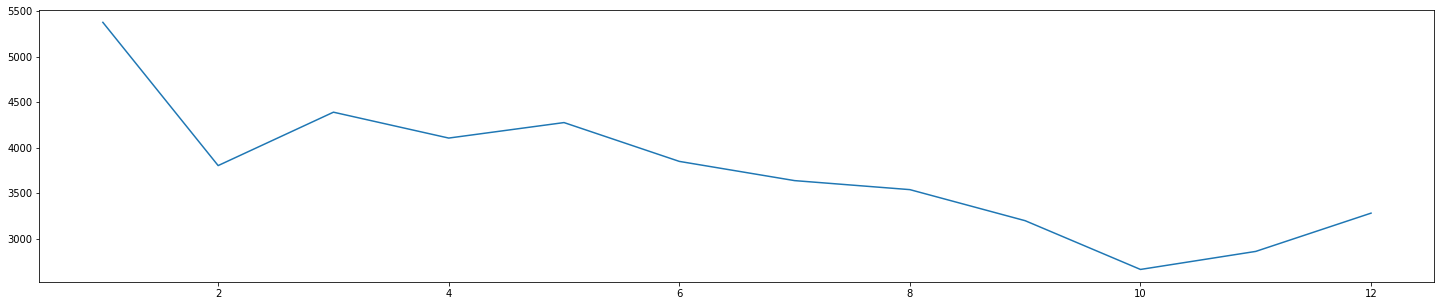

In [8]:
data["Month"]=data["Timestamp"].dt.month
month_count=data.groupby(["Month"]).count()
plt.figure(figsize=(25, 5))
plt.plot(month_average.index, month_count["Rating"])

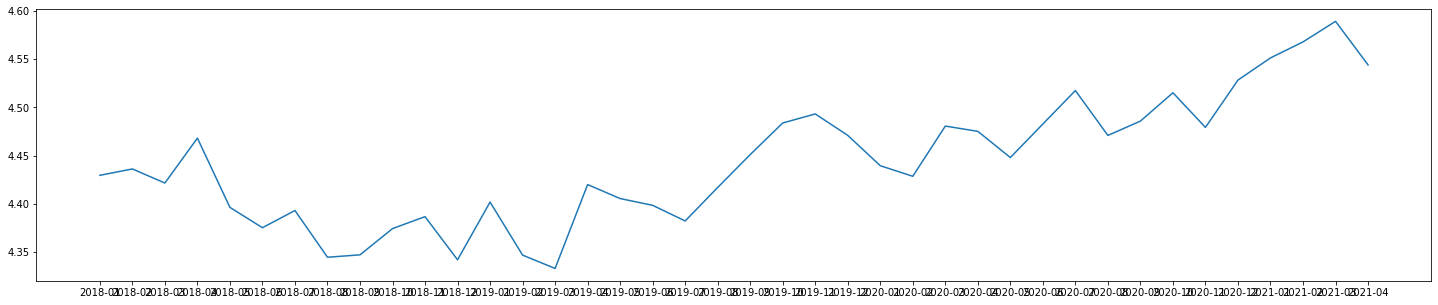

In [9]:
data["Month"]=data["Timestamp"].dt.strftime("%Y-%m")
month_average=data.groupby(["Month"]).mean()
plt.figure(figsize=(25, 5))
plt.plot(month_average.index, month_average["Rating"])

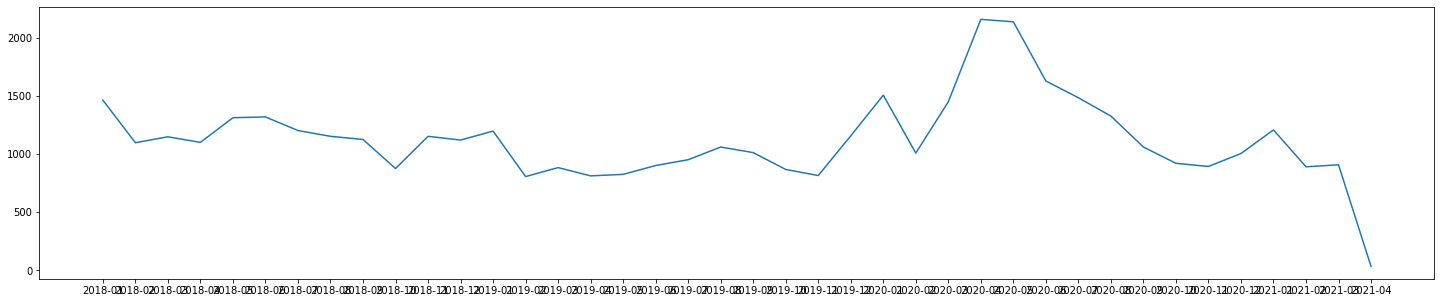

In [10]:
data["Month"]=data["Timestamp"].dt.strftime("%Y-%m")
month_count=data.groupby(["Month"]).count()
plt.figure(figsize=(25, 5))
plt.plot(month_average.index, month_count["Rating"])

### Average rating by month by course

<AxesSubplot:xlabel='Month'>

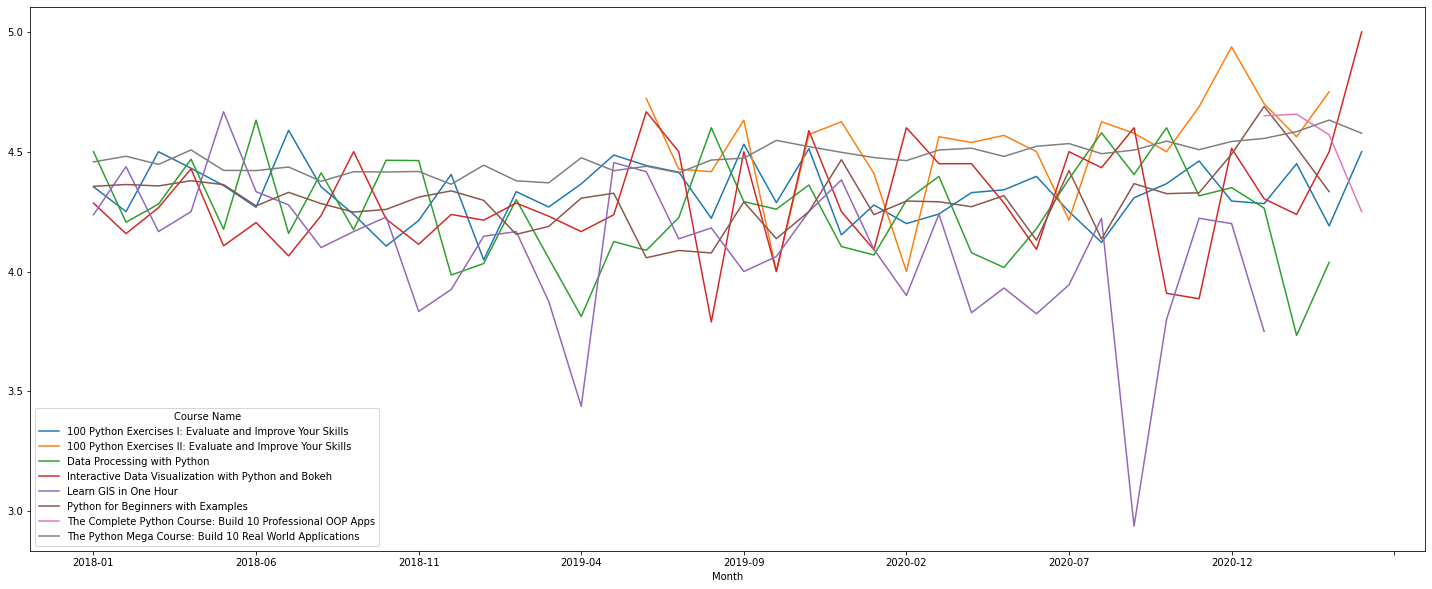

In [11]:
data["Month"]=data["Timestamp"].dt.strftime("%Y-%m")
month_average_course=data.groupby(["Month", "Course Name"])["Rating"].mean().unstack()
month_average_course.plot(figsize=(25, 10))
# plt.plot(month_average.index, month_average["Rating"])

### What day of the week are people happiest

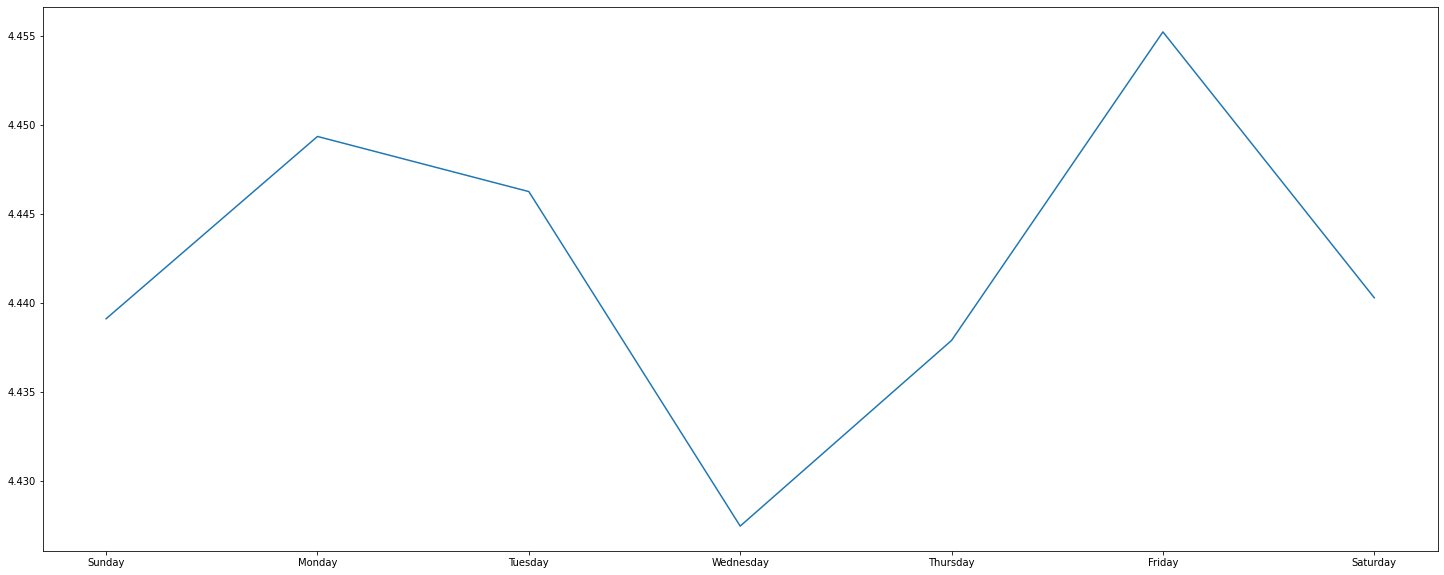

In [17]:
data["Weekday"]=data["Timestamp"].dt.strftime("%A")
data["Day Number"]=data["Timestamp"].dt.strftime("%w")
weekday_average=data.groupby(["Weekday", "Day Number"]).mean()
weekday_average=weekday_average.sort_values("Day Number")
plt.figure(figsize=[25,10])
plt.plot(weekday_average.index.get_level_values(0), weekday_average["Rating"])